In [1]:
# optional but useful for debugging - reimports modules after editing and saving .py files
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import scipy
# tqdm is very optional, it just shows a progress bar for for loops
from tqdm import tqdm

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%config InlineBackend.figure_format = 'retina'

In [4]:
import zplots as zpl
zpl.set_mpl_defaults()

# lets just start with some data to plot - a cardiod with a bit of random noise

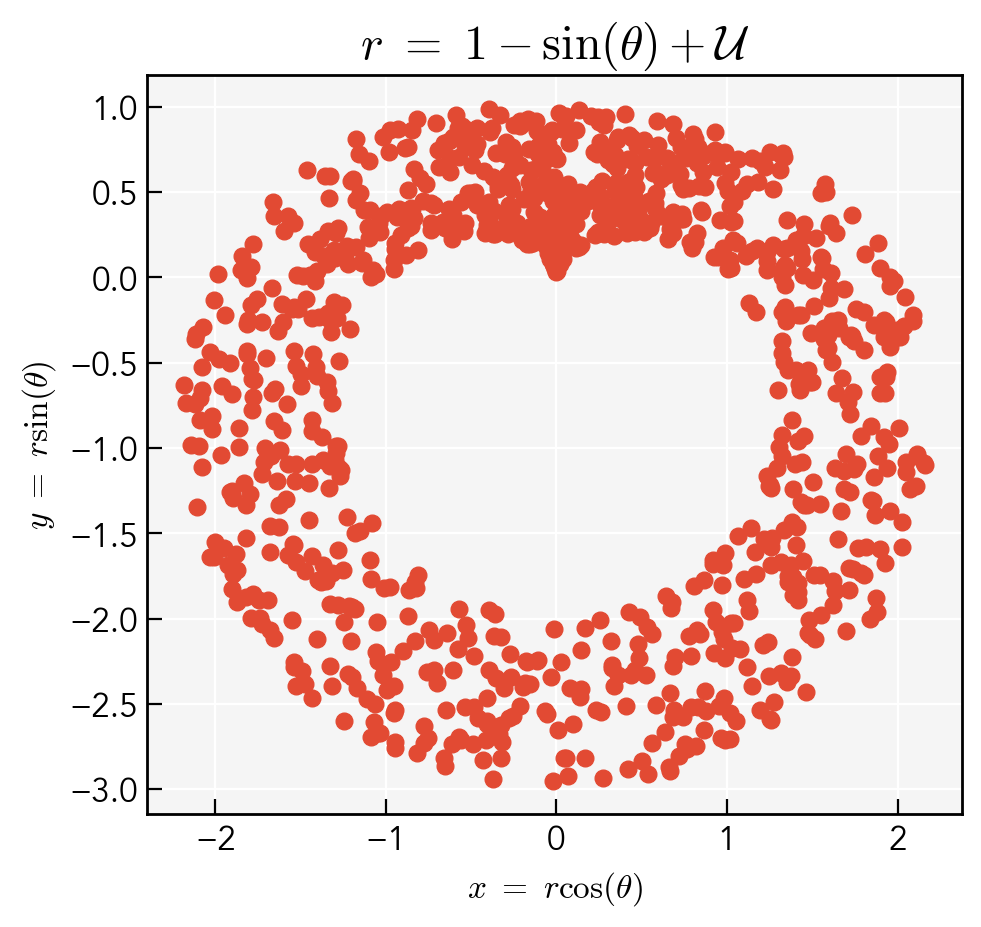

In [5]:
thetas=np.sort(2*np.pi*np.random.rand(1000))
rs=1-np.sin(thetas)+np.random.rand(1000)

ax=plt.gca()
ax.set_aspect('equal')
im=ax.scatter(rs*np.cos(thetas),rs*np.sin(thetas))
ax.set_xlabel(r'$x \ = \ r \cos(\theta)$')
ax.set_ylabel(r'$y \ = \ r \sin(\theta)$')
ax.set_title(r'$r \ = \ 1 - \sin(\theta) + \mathcal{U}$')
plt.show()

# zplots can make colormaps (of the same type as matplotlibs 'viridis', 'Spectral' etc) from some given hex colours

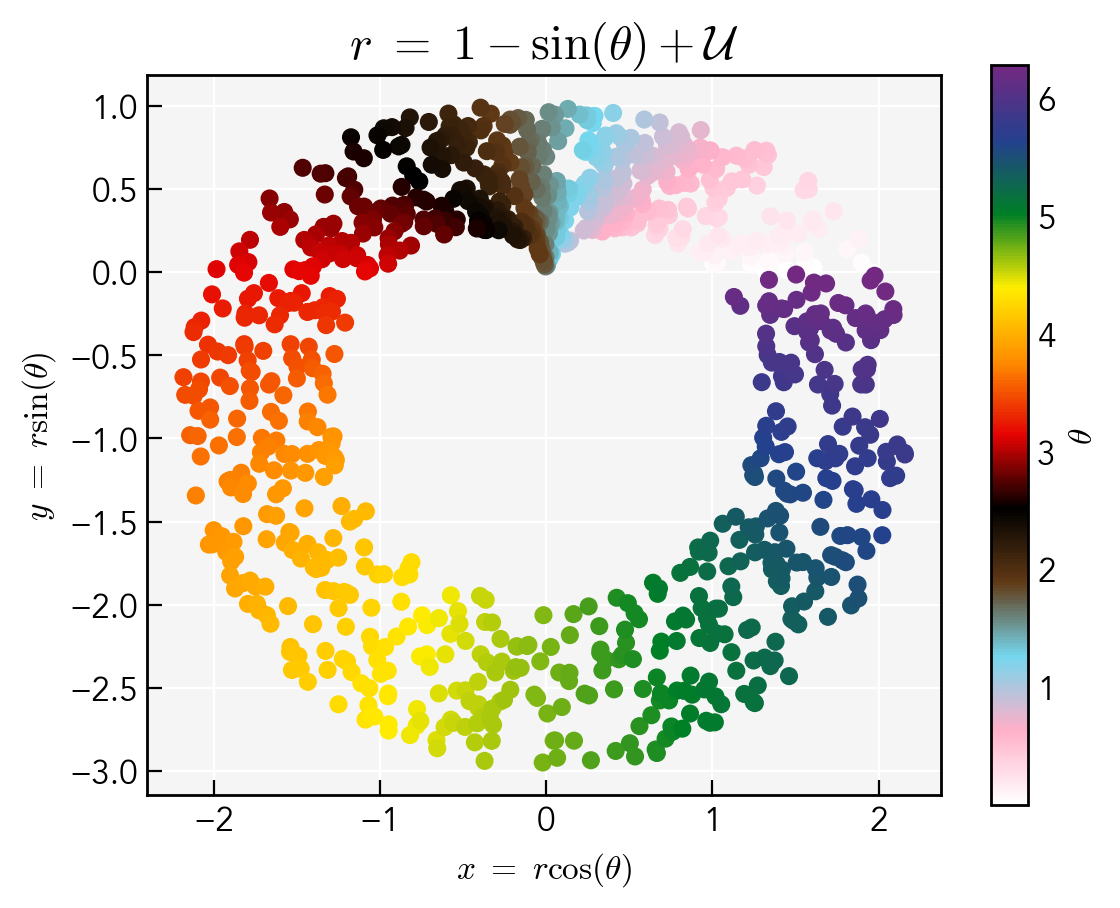

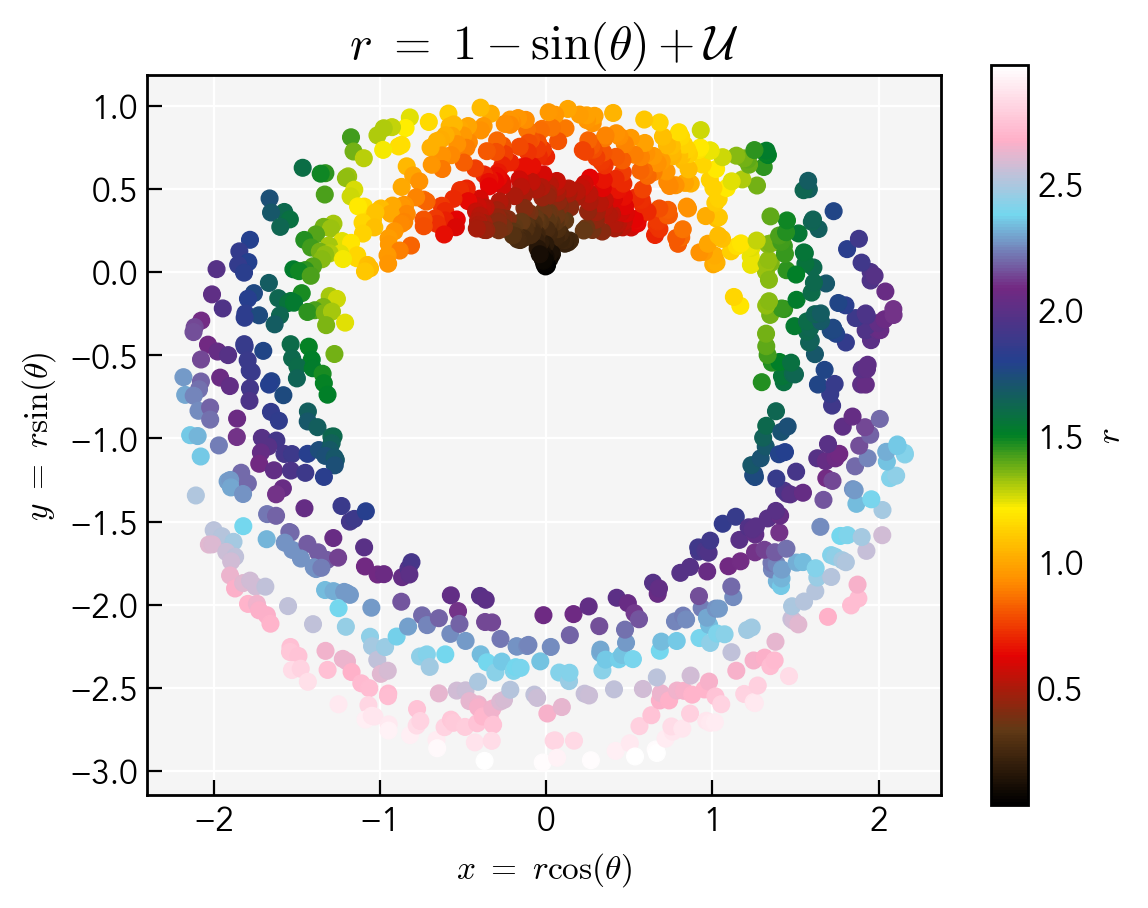

In [6]:
# pride progress flag colours (also hardcoded as zpl.pride_progress_cs)
cs=['#FFFFFF','#FFAFC8','#74D7EE','#613915','#000000','#E40303','#FF8C00','#FFED00','#008026','#24408E','#732982']
cmap=zpl.makeCmap(cs)

# similar but with the colours re-ordered to make a slightly more functional cmap
altcmap=zpl.makeCmap(zpl.pride_progress_altcs)

ax=plt.gca()
ax.set_aspect('equal')
im=ax.scatter(rs*np.cos(thetas),rs*np.sin(thetas),c=thetas,cmap=cmap)
plt.colorbar(im,label=r'$\theta$')
ax.set_xlabel(r'$x \ = \ r \cos(\theta)$')
ax.set_ylabel(r'$y \ = \ r \sin(\theta)$')
ax.set_title(r'$r \ = \ 1 - \sin(\theta) + \mathcal{U}$')
plt.show()

ax=plt.gca()
ax.set_aspect('equal')
im=ax.scatter(rs*np.cos(thetas),rs*np.sin(thetas),c=rs,cmap=altcmap)
plt.colorbar(im,label=r'$r$')
ax.set_xlabel(r'$x \ = \ r \cos(\theta)$')
ax.set_ylabel(r'$y \ = \ r \sin(\theta)$')
ax.set_title(r'$r \ = \ 1 - \sin(\theta) + \mathcal{U}$')
plt.show()

# plt.colorbar() is kind of a mess, it resizes your plots and relies on you having a single mappable to define the whole colorbar

instead zplots allows you to make a colorbar, with a given colormap, in a seperate axes object (thus deciding exactly where and how you want it)

a couple of other features on show here are a cenetered axis (i.e. axis lines go through 0,0) - though note that the label placement can be a bit tricky/ space inneficient

there's also a few function in there, like zpl.make_grid(), that streamline the gridspec process (similar for zpl.make_plot())

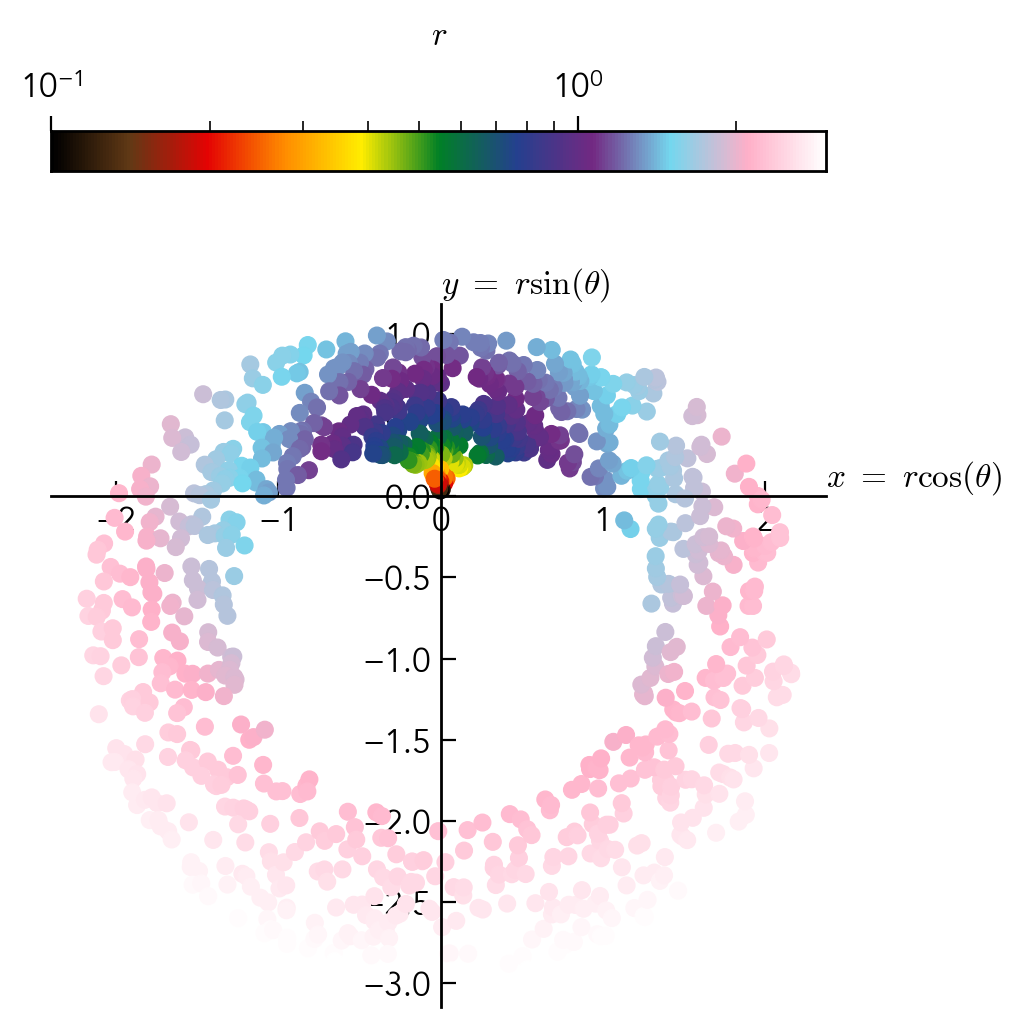

In [7]:
# most calls either take an optional 'ax' variable, or make and return a new one
fig,grid=zpl.make_grid(1,2,figsize=(5,6),height_ratios=[0.05,1])

ax=plt.subplot(grid[1,0])
zpl.centeraxis(xlabel=r'$x \ = \ r \cos(\theta)$',ylabel=r'$y \ = \ r \sin(\theta)$',ax=ax)
ax.set_aspect('equal')
ax.scatter(rs*np.cos(thetas),rs*np.sin(thetas),c=np.log10(rs),cmap=altcmap)

cbax=plt.subplot(grid[0,0])
zpl.make_cbar(cbax,altcmap,vmin=0.1,vmax=np.max(rs),scale='log',label=r'$r$',orientation='horizontal',position='top')

plt.show()

# you may be familiar that plt.plot() doesn't allow variable colour (or alpha) along one line - zpl.cplot() fixes that

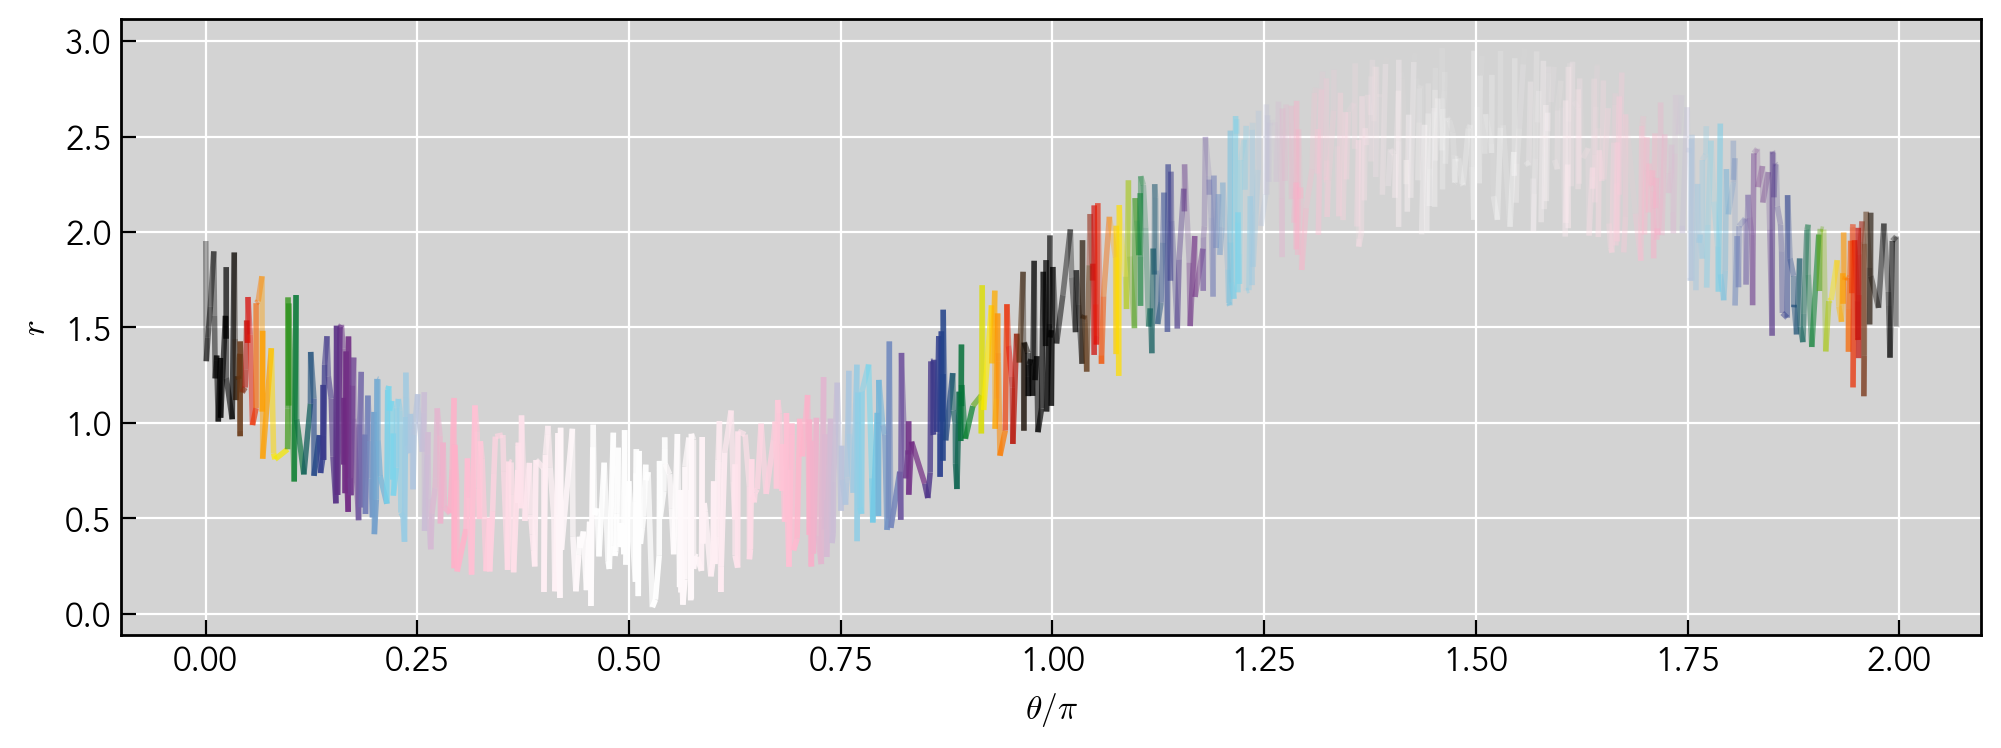

In [8]:
fig,ax = zpl.make_plot(figsize=(12,4),xlabel=r'$\theta / \pi$',ylabel=r'$r$')
ax.set_facecolor('lightgrey') # the white of pride progress is hard to see otherwise
im=zpl.cplot(thetas/np.pi,rs,cs=np.sin(thetas)**2,cmap=altcmap,ax=ax,alpha=1-(rs/np.max(rs)),lw=2,cscale='log',vmin=1e-2)
plt.show()

# we might also want to make a plot in the form of a filled area - zpl.errline() does that (following the form of plt.errorbar)

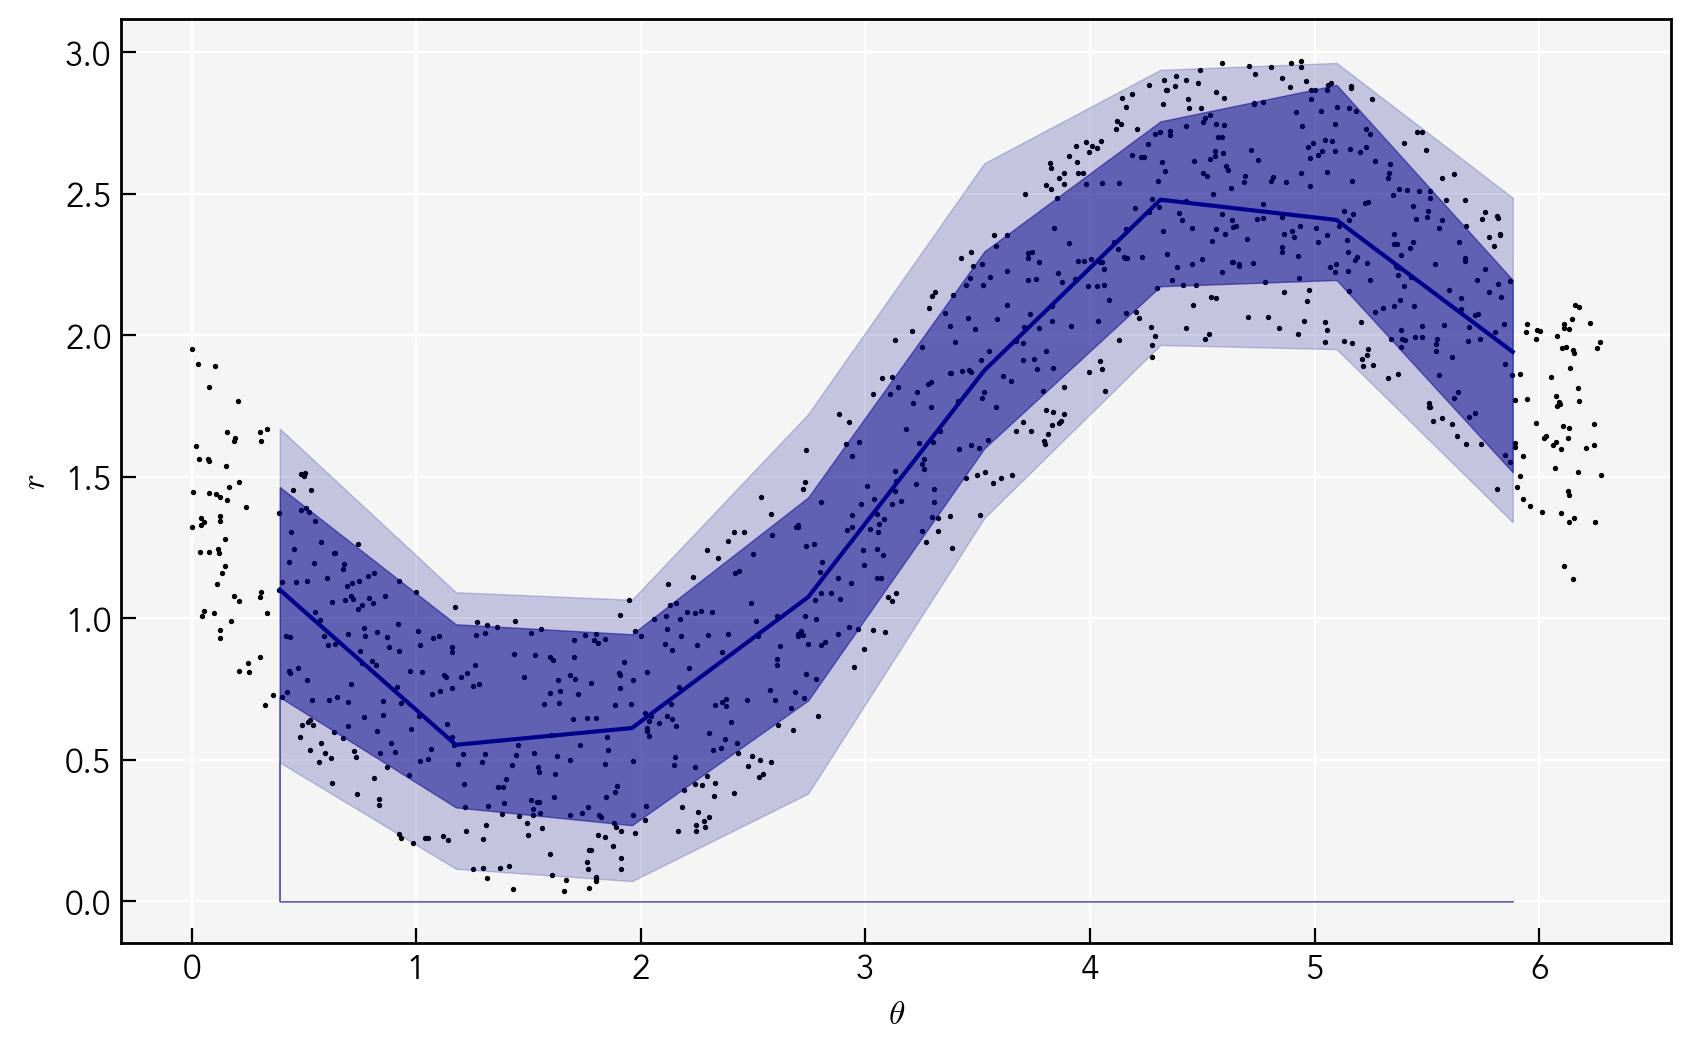

In [9]:
# finds the median value across a few bins (and confidence intervals if 'interval' defined)
bins,medians,intervals=zpl.binned_median(thetas,rs,interval=0.68,nbins=8)
mids=0.5*(bins[1:]+bins[:-1])
imids=0.5*(intervals[:,0]+intervals[:,1])
iheights=intervals[:,1]-intervals[:,0]

fig,ax = zpl.make_plot(xlabel=r'$\theta$',ylabel=r'$r$')
ax.scatter(thetas,rs,s=2,c='k')
ax.plot(mids,medians,c='darkblue',zorder=3)
zpl.zerrline(mids,imids,iheights/2,ax=ax,plotkwargs={'c':'None'},fillkwargs={'color':'darkblue','alpha':0.5})

bins,medians,intervals=zpl.binned_median(thetas,rs,interval=0.95,nbins=8)
mids=0.5*(bins[1:]+bins[:-1])
imids=0.5*(intervals[:,0]+intervals[:,1])
iheights=intervals[:,1]-intervals[:,0]
zpl.zerrline(mids,imids,iheights/2,ax=ax,plotkwargs={'c':'None'},fillkwargs={'color':'darkblue','alpha':0.2})

plt.show()

# that isn't completely satisfying (the fact that it stops before the edge and doesn't really fully capture the statistic in the plot) so instead try zpl.intervalplot()

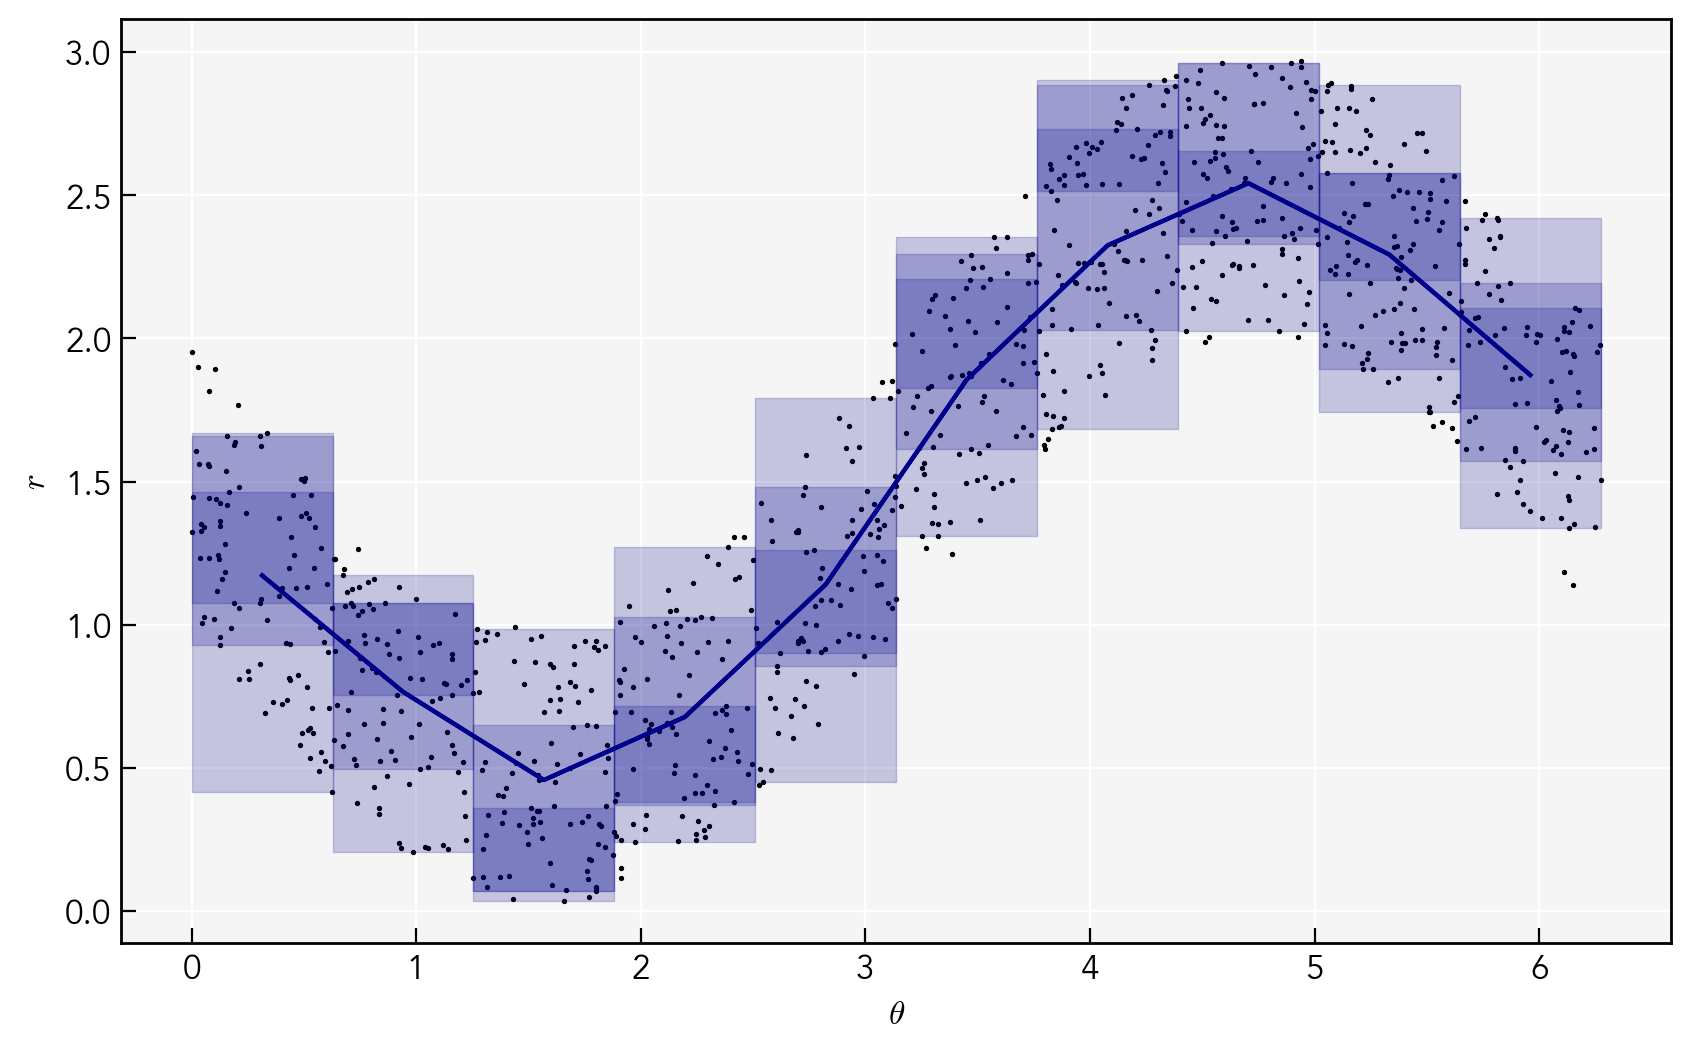

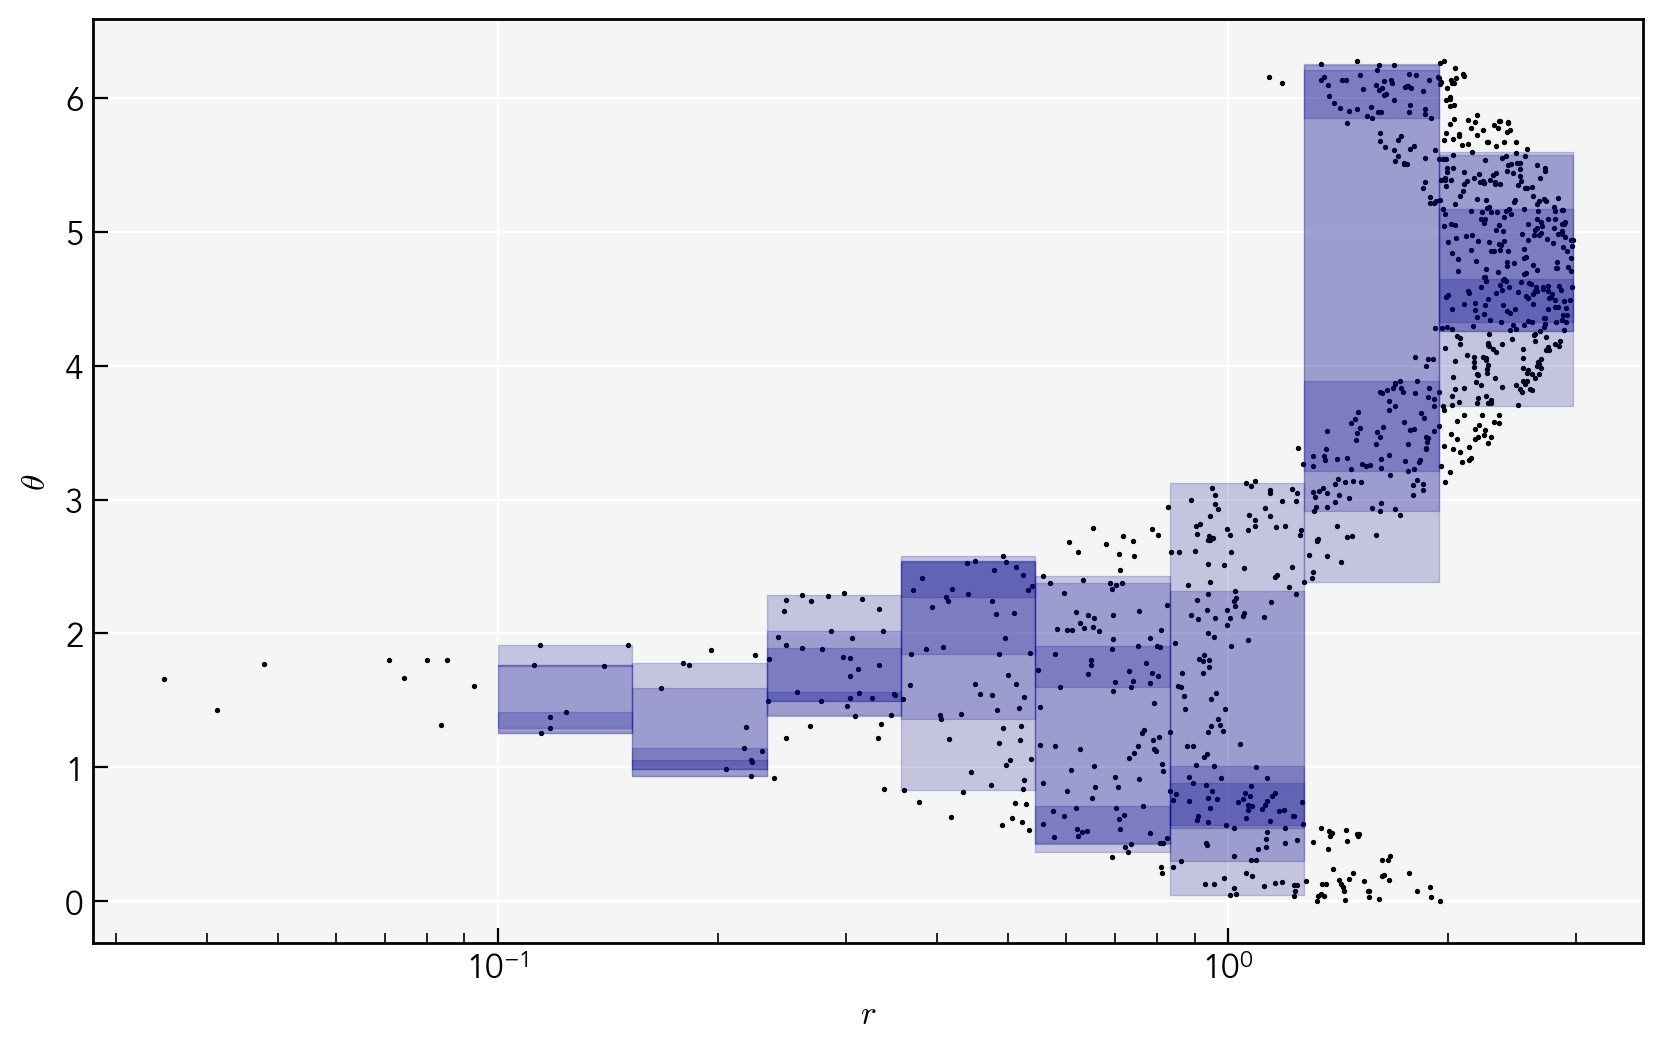

In [12]:
fig,ax = zpl.make_plot(xlabel=r'$\theta$',ylabel=r'$r$')
ax.scatter(thetas,rs,s=2,c='k')

for interval in np.array([0.95,0.68,0.4]):
    zpl.intervalplot(thetas,rs,interval,ax=ax,plotmedian=True,alpha=0.2)
plt.show()
# i never realised before that smaller confidence intervals aren't necessarily contained within larger!


fig,ax = zpl.make_plot(xlabel=r'$r$',ylabel=r'$\theta$')
ax.scatter(rs,thetas,s=2,c='k')
ax.set_xscale('log')

for interval in np.arange(0.2,1,0.2):
    zpl.intervalplot(rs,thetas,interval,ax=ax,alpha=0.2,xscale='log',xmin=-1,nbins=8)
plt.show()
# i'm not sure this is a _good_ way to plot this, but i like it!

# finally there's some more experimental stuff in here, based on voronoi tesselation and subdividing the plot area to highlight features

62 cells used


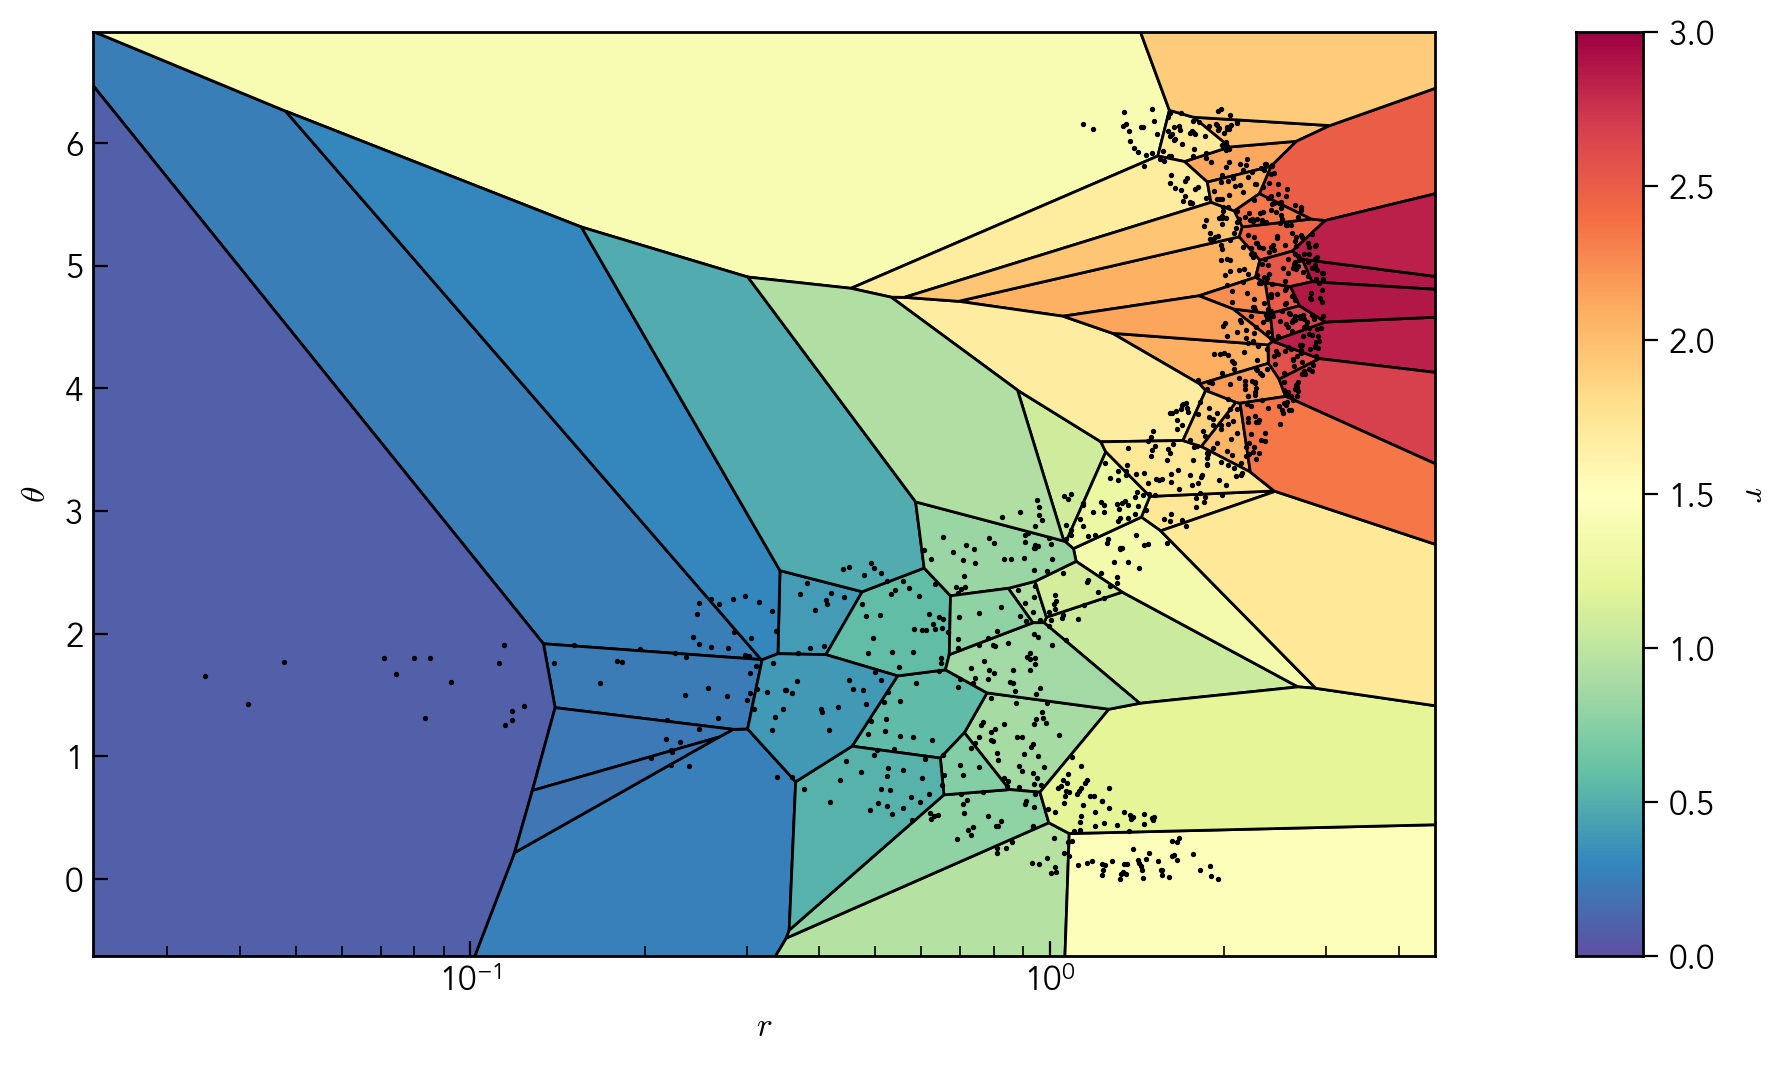

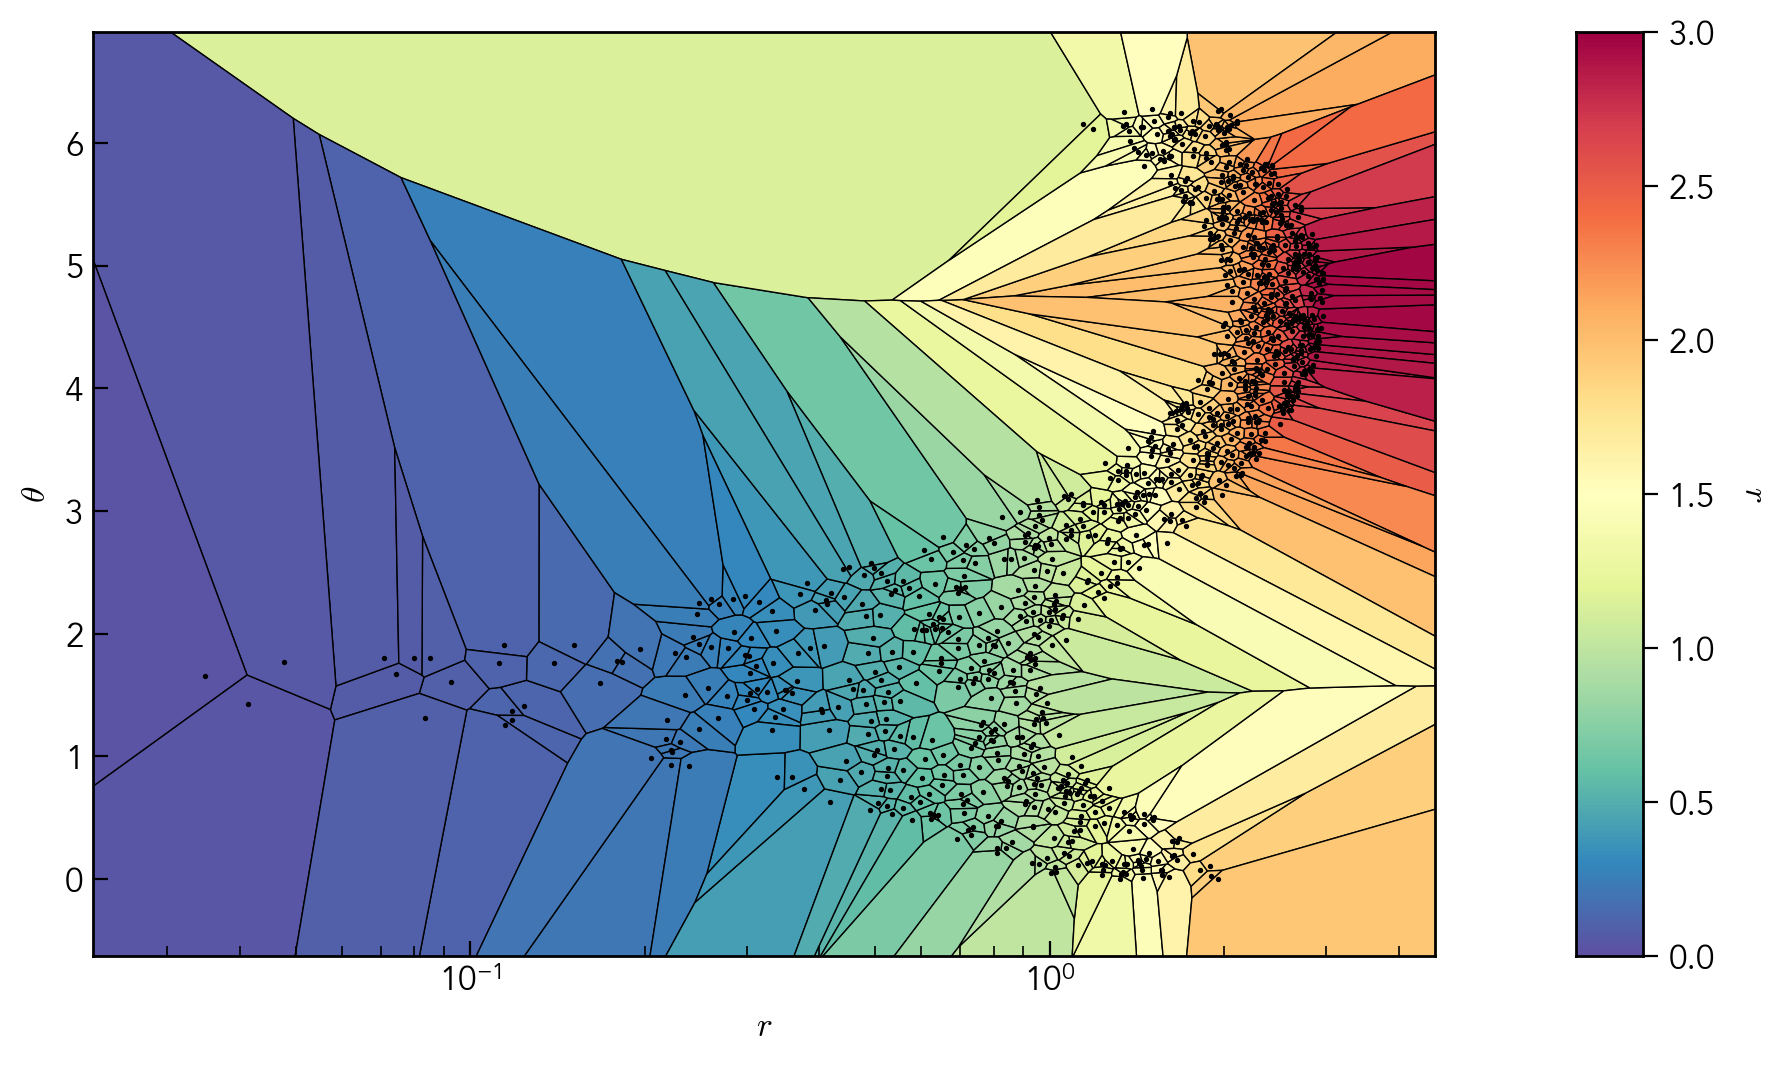

In [28]:
# we can use this to bin data (like hexbin for example)
fig,grid = zpl.make_grid(2,1,figsize=(10,6),width_ratios=[1,0.05])
ax=plt.subplot(grid[0,0])
ax.scatter(rs,thetas,s=2,c='k')
zpl.voronoibin(rs,thetas,C=rs,ax=ax,xscale='log',vmax=3,vmin=0)
ax.set_xlabel(r'$r$')
ax.set_ylabel(r'$\theta$')

cbax=plt.subplot(grid[0,1])
zpl.make_cbar(cbax,mpl.cm.Spectral_r,vmin=0,vmax=3,label=r'$r$')

plt.show()

# or if we set ncell=number of points we can make a full voronoi plot
fig,grid = zpl.make_grid(2,1,figsize=(10,6),width_ratios=[1,0.05])
ax=plt.subplot(grid[0,0])
ax.scatter(rs,thetas,s=2,c='k')
zpl.voronoibin(rs,thetas,C=rs,ncells=rs.size,ax=ax,xscale='log',vmax=3,vmin=0,linewidth=0.5)
ax.set_xlabel(r'$r$')
ax.set_ylabel(r'$\theta$')

cbax=plt.subplot(grid[0,1])
zpl.make_cbar(cbax,mpl.cm.Spectral_r,vmin=0,vmax=3,label=r'$r$')

plt.show()

In [29]:
# i'm going to save detailing subdiv() for later, as instead of precomputued data 
# it runs on a function which can be sampled where detail is need